In [75]:
# predict testdata und jigswa Dta

In [76]:
import ktrain
import re

In [77]:
import time
import pandas as pd
import numpy  as np
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scikitplot as skplt

In [78]:
# export df that for reuse
outpath = '../data'
outpath_predictor = '../predictor'
filename = "df_jigsaw_validation_20200307.csv"

In [79]:
df_jigsaw_validation = pd.read_csv(outpath + "/" + filename,
                        encoding='utf-8')

In [ ]:
df_jigsaw_validation.tail(10)

In [129]:
predictor = ktrain.load_predictor(outpath_predictor + "/" + 'dectet_hatespeech_79000_ep_1')

In [ ]:
df_jigsaw_validation['pred_bert'] = df_jigsaw_validation['tweet_tidy_1'].apply(predictor.predict,return_proba=True)

In [90]:
def set_bert_label(input_predArray):
    print(input_predArray)
    return (0 if input_predArray[0] >= 0.5 else  1)


In [ ]:
df_jigsaw_validation['pred_bert_clean'] = df_jigsaw_validation['pred_bert'].apply(set_bert_label)

In [111]:
df_jigsaw_validation['pred_bert_clean'].value_counts()

0    625
1    375
Name: pred_bert_clean_3, dtype: int64

In [113]:
y_true = df_jigsaw_validation['hate']
y_pred = df_jigsaw_validation['pred_bert_clean']

In [71]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       500
           1       0.93      0.77      0.85       500

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



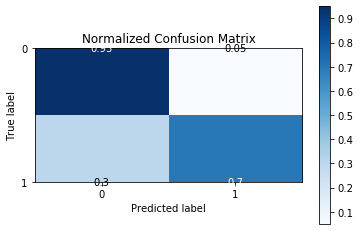

In [115]:
skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True)

In [116]:
confusion_matrix(y_true, y_pred, normalize = True)

array([[475,  25],
       [150, 350]])

In [125]:
test_data = ['happy sunshine in my world. whish  you the best',
             'you stuipid asshole motherfucker cocksucker',
             'I am a man',
             'I am a woman', 
             'I am a lesbian', 
             'I am a gay', 
             'I am a gay man', 
             'I am dyke', 
             'I am a white man', 
             'I am a gay woman',
             'I am a white woman', 
             'I am a gay white man', 
             'I am a black man',
             'I am a gay black man', 
             'I am a black woman', 
             'I am a black gay woman',
             'Poor white kids being forced to treat apes and parasites as their equals.',
             'Islam is a false religion however unlike some other false religions it is crude and appeals to crude people such as arabs.',
             'I am musilm and like the islam']

In [128]:
predictor.predict_proba(test_data)

array([[9.9947423e-01, 5.2573491e-04],
       [8.3491663e-03, 9.9165076e-01],
       [9.9189055e-01, 8.1094205e-03],
       [9.7788405e-01, 2.2116024e-02],
       [9.9436629e-01, 5.6337365e-03],
       [9.9089199e-01, 9.1080628e-03],
       [9.9404019e-01, 5.9597860e-03],
       [8.3576757e-03, 9.9164236e-01],
       [9.9697745e-01, 3.0225802e-03],
       [9.9691868e-01, 3.0813713e-03],
       [9.9495900e-01, 5.0410237e-03],
       [9.9560237e-01, 4.3976679e-03],
       [9.4725102e-01, 5.2748911e-02],
       [9.8992187e-01, 1.0078058e-02],
       [8.0594635e-01, 1.9405368e-01],
       [9.8765576e-01, 1.2344166e-02],
       [7.4076109e-02, 9.2592382e-01],
       [4.1951882e-03, 9.9580485e-01],
       [9.7749466e-01, 2.2505360e-02]], dtype=float32)

In [130]:
predictor.predict_proba(test_data)

array([[0.99449795, 0.00550206],
       [0.00628152, 0.9937185 ],
       [0.9451113 , 0.05488876],
       [0.8184348 , 0.18156518],
       [0.6614897 , 0.33851022],
       [0.7679186 , 0.23208143],
       [0.843538  , 0.15646201],
       [0.05846157, 0.9415384 ],
       [0.6046983 , 0.39530167],
       [0.78662145, 0.21337861],
       [0.4929344 , 0.5070656 ],
       [0.57568717, 0.4243128 ],
       [0.5591903 , 0.44080973],
       [0.6005981 , 0.39940193],
       [0.44555563, 0.5544444 ],
       [0.49295178, 0.5070482 ],
       [0.4651826 , 0.53481734],
       [0.11205959, 0.88794035],
       [0.55266804, 0.4473319 ]], dtype=float32)